In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay
import seaborn as sb
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore")

In [9]:
def separation_capacity(label, pred) : 
    n_clusters = int(max(label) + 1)
    print(n_clusters)

    x = np.asarray(pred).reshape(-1,1)

    model = DecisionTreeClassifier(max_leaf_nodes=n_clusters, max_depth=int(np.ceil(n_clusters/2)))
    model.fit(x, label)
    tree_pred = model.predict(x)
    score = balanced_accuracy_score(label,tree_pred)
    print(score)
    
    thresholds = list(sorted(model.tree_.threshold[:n_clusters-1]))
    print("Thresholds:")
    print(thresholds)
    sb.swarmplot(x=np.asarray(pred), hue=np.asarray(label))
    for thresh in thresholds:
        plt.axvline(x = thresh, color = 'r' )
    plt.legend(title="label")

    ConfusionMatrixDisplay.from_estimator(model, x, label)
    return tree_pred


,pred,identifier,label
11,0.024741,sub-000183_ses-headmotion2,2
5,0.031640,sub-000148_ses-headmotion2,2
32,0.032206,sub-177856_ses-headmotion2,2
41,0.032563,sub-281888_ses-headmotion2,2
28,0.036683,sub-153486_ses-headmotion1,2
4,0.037244,sub-000148_ses-headmotion1,2
52,0.039007,sub-453666_ses-headmotion2,2
37,0.039423,sub-258056_ses-headmotion1,2
70,0.040597,sub-654178_ses-headmotion2,2
38,0.041850,sub-258056_ses-headmotion2,2


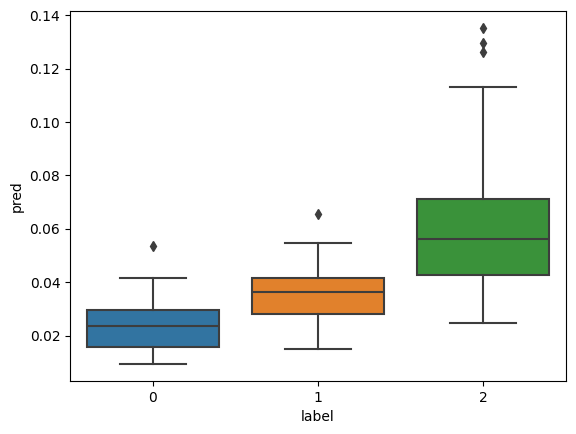

In [36]:
df = pd.read_csv("/home/at70870/Downloads/ValMrArt-pred.csv", index_col=0)
sb.boxplot(df, x="label", y="pred")
lozest = df[df['label']==2]['pred'].argsort()
df[df['label']==2].iloc[lozest]

<Axes: xlabel='pred'>

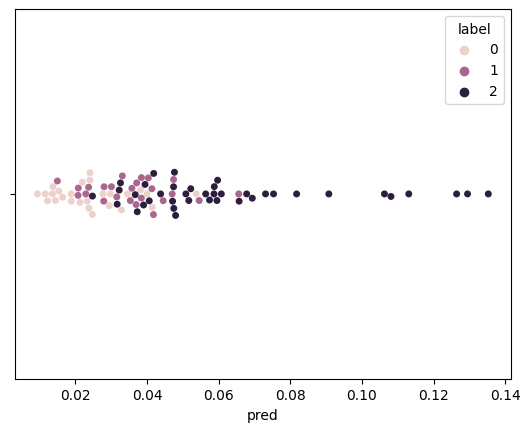

In [11]:
sb.swarmplot(df, x="pred", hue="label")

3
0.6794871794871794
Thresholds:
[0.02990434318780899, 0.04180974327027798]


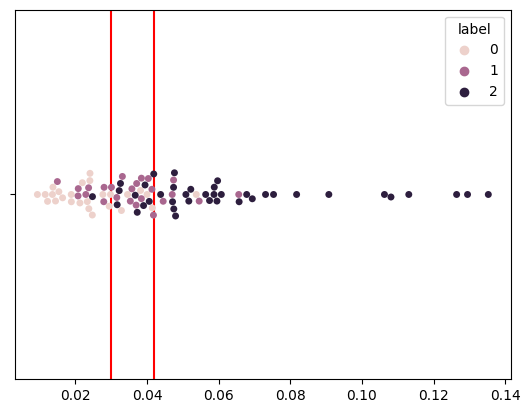

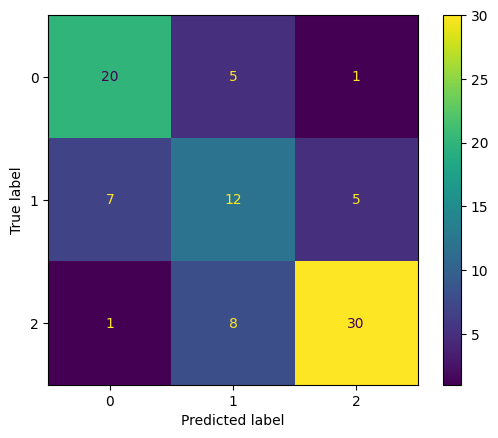

In [12]:
tree_pred = separation_capacity(df['label'],df['pred'])

In [37]:
df['tree_pred'] = tree_pred
df['bad_pred']= df['tree_pred']!= df['label']

def find_closest(df, pred):
    dist = np.abs(df['pred'].to_numpy()-pred)
    closest = np.argsort(dist)[1]
    return df['identifier'].iloc[closest], df['label'].iloc[closest],dist[closest],df['pred'].iloc[closest]


df['closest'] = df['pred'].apply(lambda x: find_closest(df[df['bad_pred']==False], x))
bad_preds = df[df["bad_pred"]]
print(bad_preds.to_string())

        pred                  identifier  label  tree_pred  bad_pred                                                                      closest
1   0.027896  sub-000103_ses-headmotion1      1          0      True      (sub-750675_ses-standard, 0, 0.0015203490503084977, 0.0294158551162374)
4   0.037244  sub-000148_ses-headmotion1      2          1      True    (sub-281888_ses-headmotion1, 1, 0.0003023592607728984, 0.036942041466436)
5   0.031640  sub-000148_ses-headmotion2      2          1      True    (sub-678878_ses-headmotion1, 1, 0.001453107791319394, 0.0330929898335998)
9   0.014940     sub-000183_ses-standard      1          0      True      (sub-678878_ses-standard, 0, 0.0005179159886016995, 0.0144217995717643)
10  0.020774  sub-000183_ses-headmotion1      1          0      True       (sub-153486_ses-standard, 0, 0.0011382836350904008, 0.021912582150731)
11  0.024741  sub-000183_ses-headmotion2      2          0      True      (sub-000148_ses-standard, 0, 0.0006906251393559992

<Axes: xlabel='label', ylabel='pred'>

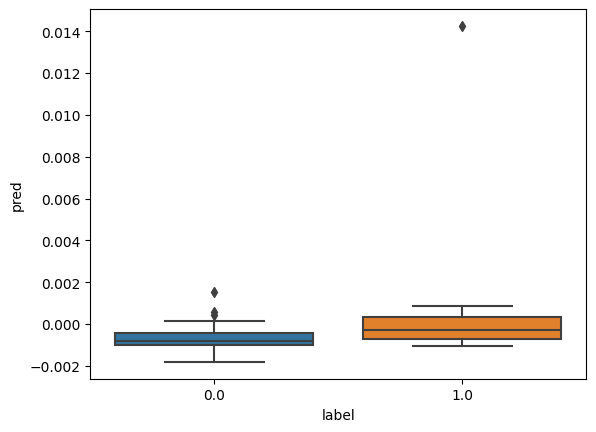

In [68]:
df = pd.read_csv("/home/at70870/Downloads/FinetuneValAMPSCZ-pred.csv", index_col=0)
sb.boxplot(df, x="label", y="pred")

<Axes: xlabel='pred'>

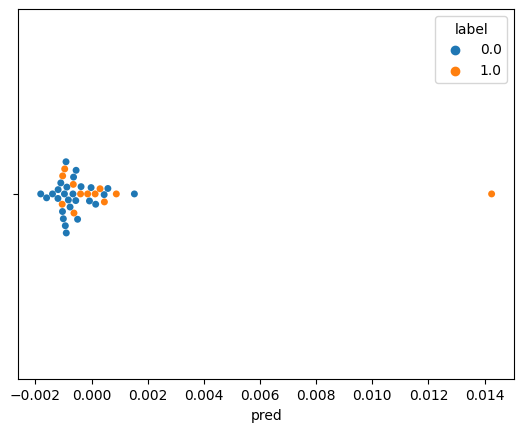

In [69]:
sb.swarmplot(df, x="pred", hue="label")

2
0.6923076923076923
Thresholds:
[-0.0006592826684936881]


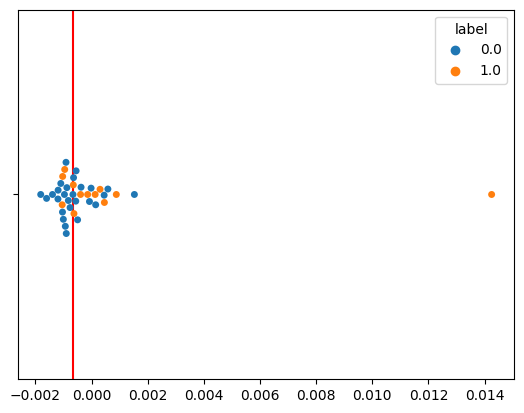

In [70]:
separation_capacity(df['label'],df['pred'])

(0.0031532703300774, 0.2210890892148017)

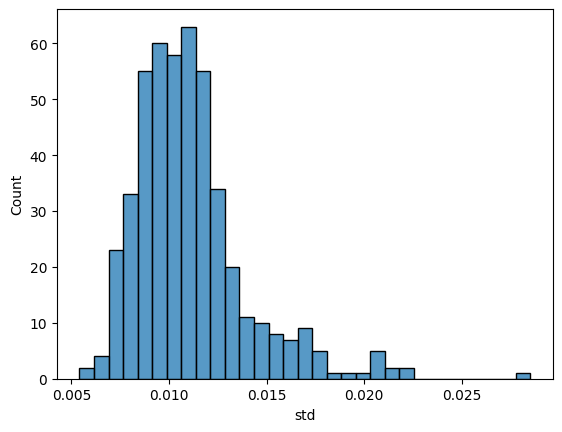

In [139]:
df = pd.read_csv("/home/at70870/Downloads/mcdropout-res.csv", index_col=0)
# sb.boxplot(df, x="label", y="pred")
df['label']=df['label'].astype(float)
sb.histplot(df, x="std")
df['mean'].min(), df['mean'].max()

In [204]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
df['ls_preds'] = df['predictions'].apply(eval)


def compute_conf(ls):
    arr_preds = np.array([ls])
    binned = np.digitize(arr_preds, bins=np.linspace(0, 0.3,8))
    counted = np.bincount(binned[0])
    return counted.max()/counted.sum()

df['conf'] = df['ls_preds'].apply(compute_conf)
df['conf'].max(), df['conf'].min() 

(1.0, 0.47)

In [205]:
from sklearn.metrics import r2_score


def get_prop_mse_r2(df:pd.DataFrame, conf:float):
    filtered = df[df['conf']>=conf]
    if len(filtered)==0:
        mse=0
        r2=0
    else:
        mse = ((filtered['mean']-filtered['label'])**2).mean()
        r2 = max(r2_score(filtered['label'], filtered['mean']),0)
    filtered_prop = len(filtered)/len(df)
    return mse, r2, filtered_prop

get_prop_mse_r2(df,0)

(0.0003055973899059854, 0.9410446322924488, 1.0)

(0.00022909319082034212,
 0.474468085106383,
 74.96568962543196,
 0.9473993429107166,
 0.7702127659574468,
 99.32924688350067)

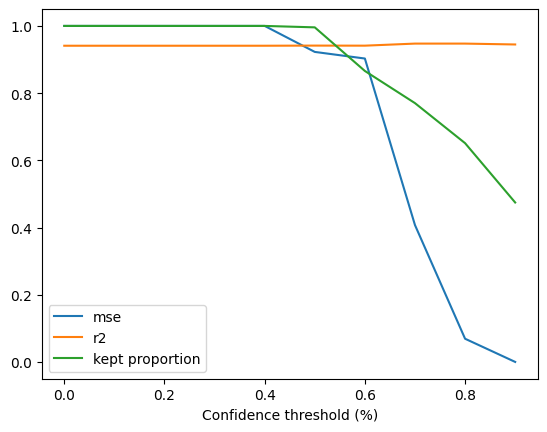

In [224]:
mses = []
r2s = []
props = []
x=np.arange(0,1, 0.1)

for i in x:
    (m,r,p)=get_prop_mse_r2(df, i)
    mses.append(m)
    r2s.append(r)
    props.append(p)

r2s = np.array(r2s)
mses = np.array(mses)
range_t = mses.max() - mses.min()
perc_mses = (mses -mses.min())/range_t

gain = 100*mses.min()/mses.max()
gain_r2 = 100*r2s.min()/r2s.max()

plt.plot(x,perc_mses, label="mse")
plt.plot(x,r2s, label="r2")
plt.plot(x,props, label="kept proportion")
plt.xlabel("Confidence threshold (%)")
# plt.ylim((0.9,1.1))
plt.legend()
np.min(mses), props[np.argmin(mses)], gain, np.max(r2s), props[np.argmax(r2s)], gain_r2, 

In [226]:
get_prop_mse_r2(df,0.8)


(0.00023437248696167015, 0.9473899622296801, 0.6510638297872341)

: 

Text(0.5, 1.0, 'Label against Prediction with 100% confidence')

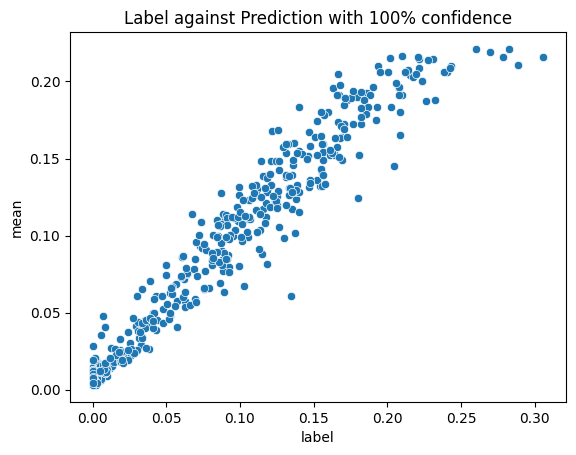

In [216]:
sb.scatterplot(df[df['conf']>=0.5], x="label", y="mean")
plt.title("Label against Prediction with 100% confidence")